In [1]:
import pandas as pd
import pyarrow.dataset as pads
from SMT_data_starter import readDataSubset

## Getting season metrics for all pitchers

In [2]:
game_info_subset = readDataSubset('game_info', '2024_SMT_Data_Challenge')
game_info_1A = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home1A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000)).to_pandas().dropna(subset=['pitcher'])
game_info_2A = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home2A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000)).to_pandas().dropna(subset=['pitcher'])
game_info_3A = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home3A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000)).to_pandas().dropna(subset=['pitcher'])
game_info_4A = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home4A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000)).to_pandas().dropna(subset=['pitcher'])

In [3]:
game_events_subset = readDataSubset('game_events', '2024_SMT_Data_Challenge')
game_events_1A = game_events_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('HomeTeam') == 'Home1A')).to_pandas()
game_events_2A = game_events_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('HomeTeam') == 'Home2A')).to_pandas()
game_events_3A = game_events_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('HomeTeam') == 'Home3A')).to_pandas()
game_events_4A = game_events_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('HomeTeam') == 'Home4A')).to_pandas()

In [4]:
from functions import calculate_pace, calculate_rest_days, get_pitching_metrics, create_pitching_metrics_df, create_cumulative_pitching_metrics_df, get_season_metrics_df, apply_fatigue_unit_equation, apply_muscle_fatigue_equation

In [5]:
pitchers_list_1A = game_info_1A['pitcher'].unique().tolist()
pitchers_list_2A = game_info_2A['pitcher'].unique().tolist()
pitchers_list_3A = game_info_3A['pitcher'].unique().tolist()
pitchers_list_4A = game_info_4A['pitcher'].unique().tolist()

In [6]:
hits_list_1A, walks_list_1A, strikeout_list_1A, batters_faced_list_1A, innings_pitched_list_1A, is_starter_list_1A = get_pitching_metrics(game_info_1A, '1A')
hits_list_2A, walks_list_2A, strikeout_list_2A, batters_faced_list_2A, innings_pitched_list_2A, is_starter_list_2A = get_pitching_metrics(game_info_2A, '2A')
hits_list_3A, walks_list_3A, strikeout_list_3A, batters_faced_list_3A, innings_pitched_list_3A, is_starter_list_3A = get_pitching_metrics(game_info_3A, '3A')
hits_list_4A, walks_list_4A, strikeout_list_4A, batters_faced_list_4A, innings_pitched_list_4A, is_starter_list_4A = get_pitching_metrics(game_info_4A, '4A')

In [7]:
pitching_metrics_1A = create_pitching_metrics_df(game_info_1A, hits_list_1A, walks_list_1A, strikeout_list_1A, batters_faced_list_1A, innings_pitched_list_1A, is_starter_list_1A)
pitching_metrics_2A = create_pitching_metrics_df(game_info_2A, hits_list_2A, walks_list_2A, strikeout_list_2A, batters_faced_list_2A, innings_pitched_list_2A, is_starter_list_2A)
pitching_metrics_3A = create_pitching_metrics_df(game_info_3A, hits_list_3A, walks_list_3A, strikeout_list_3A, batters_faced_list_3A, innings_pitched_list_3A, is_starter_list_3A)
pitching_metrics_4A = create_pitching_metrics_df(game_info_4A, hits_list_4A, walks_list_4A, strikeout_list_4A, batters_faced_list_4A, innings_pitched_list_4A, is_starter_list_4A)

In [8]:
total_pitches_list_1A, pace_list_1A = calculate_pace(game_info_1A, '1A')
total_pitches_list_2A, pace_list_2A = calculate_pace(game_info_2A, '2A')
total_pitches_list_3A, pace_list_3A = calculate_pace(game_info_3A, '3A')
total_pitches_list_4A, pace_list_4A = calculate_pace(game_info_4A, '4A')

In [9]:
pitching_metrics_1A['total_pitches'] = total_pitches_list_1A
pitching_metrics_1A['pace'] = pace_list_1A
pitching_metrics_2A['total_pitches'] = total_pitches_list_2A
pitching_metrics_2A['pace'] = pace_list_2A
pitching_metrics_3A['total_pitches'] = total_pitches_list_3A
pitching_metrics_3A['pace'] = pace_list_3A
pitching_metrics_4A['total_pitches'] = total_pitches_list_4A
pitching_metrics_4A['pace'] = pace_list_4A

In [10]:
pitching_metrics_1A['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_1A)
pitching_metrics_2A['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_2A)
pitching_metrics_3A['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_3A)
pitching_metrics_4A['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_4A)

In [11]:
cumulative_metrics_1A = create_cumulative_pitching_metrics_df(pitching_metrics_1A).drop(columns=['pace'])
cumulative_metrics_2A = create_cumulative_pitching_metrics_df(pitching_metrics_2A).drop(columns=['pace'])
cumulative_metrics_3A = create_cumulative_pitching_metrics_df(pitching_metrics_3A).drop(columns=['pace'])
cumulative_metrics_4A = create_cumulative_pitching_metrics_df(pitching_metrics_4A).drop(columns=['pace'])

In [12]:
cumulative_metrics_1A['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_1A)
cumulative_metrics_2A['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_2A)
cumulative_metrics_3A['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_3A)
cumulative_metrics_4A['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_4A)

muscle_fatigue_1A_cumsum = pitching_metrics_1A.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()
muscle_fatigue_2A_cumsum = pitching_metrics_2A.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()
muscle_fatigue_3A_cumsum = pitching_metrics_3A.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()
muscle_fatigue_4A_cumsum = pitching_metrics_4A.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()

cumulative_metrics_1A['average_muscle_fatigue'] = muscle_fatigue_1A_cumsum / (cumulative_metrics_1A['games_played'])
cumulative_metrics_2A['average_muscle_fatigue'] = muscle_fatigue_2A_cumsum / (cumulative_metrics_2A['games_played'])
cumulative_metrics_3A['average_muscle_fatigue'] = muscle_fatigue_3A_cumsum / (cumulative_metrics_3A['games_played'])
cumulative_metrics_4A['average_muscle_fatigue'] = muscle_fatigue_4A_cumsum / (cumulative_metrics_4A['games_played'])

In [13]:
cumulative_metrics_1A = cumulative_metrics_1A.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)
cumulative_metrics_2A = cumulative_metrics_2A.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)
cumulative_metrics_3A = cumulative_metrics_3A.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)
cumulative_metrics_4A = cumulative_metrics_4A.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)

In [14]:
cumulative_metrics_1A['rest_days'] = calculate_rest_days(cumulative_metrics_1A)
cumulative_metrics_2A['rest_days'] = calculate_rest_days(cumulative_metrics_2A)
cumulative_metrics_3A['rest_days'] = calculate_rest_days(cumulative_metrics_3A)
cumulative_metrics_4A['rest_days'] = calculate_rest_days(cumulative_metrics_4A)

In [15]:
season_df = pd.concat([get_season_metrics_df(cumulative_metrics_1A), get_season_metrics_df(cumulative_metrics_2A), get_season_metrics_df(cumulative_metrics_3A), get_season_metrics_df(cumulative_metrics_4A)]).drop(columns=['rest_days'])
season_df.rename(columns={'game_day': 'last_game_day_played'}, inplace=True)

In [16]:
season_df.reset_index(drop=True)

,pitcher,hits,walks,strikeouts,batters_faced,innings_pitched,games_started,games_relieved,total_pitches,games_played,BB/IP,K/IP,Batters/IP,WHIP,average_pace,fatigue_units,average_muscle_fatigue,last_game_day_played,average_rest_days,level
0,305,14,0,4,35,14,1,3,189,4,0.0,0.285714,2.5,1.0,13.096954,1.717143,1.591507,96,6.75,1
1,344,13,2,4,30,11,0,4,165,4,0.181818,0.363636,2.727273,1.363636,10.501347,1.398182,1.405477,54,5.25,1
2,354,46,10,8,72,39,8,0,575,8,0.25641,0.205128,1.846154,1.435897,12.482032,5.588718,2.380921,135,9.75,1
3,364,37,5,11,54,27,6,0,433,6,0.185185,0.407407,2.0,1.555556,13.661606,4.084444,2.387542,136,18.833333,1
4,367,12,4,8,62,17,0,9,240,9,0.235294,0.470588,3.647059,0.941176,12.48099,2.398824,0.934257,76,6.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,956,21,3,13,96,32,1,15,395,16,0.09375,0.40625,3.0,0.75,12.873518,4.76625,0.870021,106,5.625,4
116,964,13,2,6,52,16,0,10,197,10,0.125,0.375,3.25,0.9375,14.667017,2.47375,0.706296,54,4.1,4
117,978,9,4,4,52,17,0,10,216,10,0.235294,0.235294,3.058824,0.764706,16.263733,2.521176,0.763423,143,5.6,4
118,987,22,1,4,66,19,1,9,274,10,0.052632,0.210526,3.473684,1.210526,14.329481,2.821053,0.953472,120,7.3,4


In [17]:
season_df[['average_rest_days', 'fatigue_units', 'average_muscle_fatigue', 'WHIP', 'K/IP', 'innings_pitched', 'total_pitches', 'games_played']] = season_df[['average_rest_days', 'fatigue_units', 'average_muscle_fatigue', 'WHIP', 'K/IP', 'innings_pitched', 'total_pitches', 'games_played']].astype(float)

In [18]:
season_df.to_csv('season_metrics.csv', index=False)

## Getting metrics for pitchers who played in extra-innings

In [19]:
game_info_1A_extra = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home1A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000) & (pads.field('inning') > 9)).to_pandas().dropna(subset=['pitcher'])
game_info_2A_extra = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home2A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000) & (pads.field('inning') > 9)).to_pandas().dropna(subset=['pitcher'])
game_info_3A_extra = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home3A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000) & (pads.field('inning') > 9)).to_pandas().dropna(subset=['pitcher'])
game_info_4A_extra = game_info_subset.to_table(filter = (pads.field('Season') == 'Season_1884') & (pads.field('home_team') == 'Home4A') & (pads.field('top_bottom') == 'top') & (pads.field('pitcher') < 1000) & (pads.field('inning') > 9)).to_pandas().dropna(subset=['pitcher'])

In [20]:
hits_list_1A_extra, walks_list_1A_extra, strikeout_list_1A_extra, batters_faced_list_1A_extra, innings_pitched_list_1A_extra, is_starter_list_1A_extra = get_pitching_metrics(game_info_1A_extra, '1A')
hits_list_2A_extra, walks_list_2A_extra, strikeout_list_2A_extra, batters_faced_list_2A_extra, innings_pitched_list_2A_extra, is_starter_list_2A_extra = get_pitching_metrics(game_info_2A_extra, '2A')
hits_list_3A_extra, walks_list_3A_extra, strikeout_list_3A_extra, batters_faced_list_3A_extra, innings_pitched_list_3A_extra, is_starter_list_3A_extra = get_pitching_metrics(game_info_3A_extra, '3A')
hits_list_4A_extra, walks_list_4A_extra, strikeout_list_4A_extra, batters_faced_list_4A_extra, innings_pitched_list_4A_extra, is_starter_list_4A_extra = get_pitching_metrics(game_info_4A_extra, '4A')

In [21]:
pitching_metrics_1A_extra = create_pitching_metrics_df(game_info_1A_extra, hits_list_1A_extra, walks_list_1A_extra, strikeout_list_1A_extra, batters_faced_list_1A_extra, innings_pitched_list_1A_extra, is_starter_list_1A_extra)
pitching_metrics_2A_extra = create_pitching_metrics_df(game_info_2A_extra, hits_list_2A_extra, walks_list_2A_extra, strikeout_list_2A_extra, batters_faced_list_2A_extra, innings_pitched_list_2A_extra, is_starter_list_2A_extra)
pitching_metrics_3A_extra = create_pitching_metrics_df(game_info_3A_extra, hits_list_3A_extra, walks_list_3A_extra, strikeout_list_3A_extra, batters_faced_list_3A_extra, innings_pitched_list_3A_extra, is_starter_list_3A_extra)
pitching_metrics_4A_extra = create_pitching_metrics_df(game_info_4A_extra, hits_list_4A_extra, walks_list_4A_extra, strikeout_list_4A_extra, batters_faced_list_4A_extra, innings_pitched_list_4A_extra, is_starter_list_4A_extra)

In [22]:
total_pitches_list_1A_extra, pace_list_1A_extra = calculate_pace(game_info_1A_extra, '1A')
total_pitches_list_2A_extra, pace_list_2A_extra = calculate_pace(game_info_2A_extra, '2A')
total_pitches_list_3A_extra, pace_list_3A_extra = calculate_pace(game_info_3A_extra, '3A')
total_pitches_list_4A_extra, pace_list_4A_extra = calculate_pace(game_info_4A_extra, '4A')

In [23]:
pitching_metrics_1A_extra['total_pitches'] = total_pitches_list_1A_extra
pitching_metrics_1A_extra['pace'] = pace_list_1A_extra
pitching_metrics_2A_extra['total_pitches'] = total_pitches_list_2A_extra
pitching_metrics_2A_extra['pace'] = pace_list_2A_extra
pitching_metrics_3A_extra['total_pitches'] = total_pitches_list_3A_extra
pitching_metrics_3A_extra['pace'] = pace_list_3A_extra
pitching_metrics_4A_extra['total_pitches'] = total_pitches_list_4A_extra
pitching_metrics_4A_extra['pace'] = pace_list_4A_extra

In [24]:
pitching_metrics_1A_extra['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_1A_extra)
pitching_metrics_2A_extra['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_2A_extra)
pitching_metrics_3A_extra['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_3A_extra)
pitching_metrics_4A_extra['muscle_fatigue'] = apply_muscle_fatigue_equation(pitching_metrics_4A_extra)

In [25]:
cumulative_metrics_1A_extra = create_cumulative_pitching_metrics_df(pitching_metrics_1A_extra).drop(columns=['pace'])
cumulative_metrics_2A_extra = create_cumulative_pitching_metrics_df(pitching_metrics_2A_extra).drop(columns=['pace'])
cumulative_metrics_3A_extra = create_cumulative_pitching_metrics_df(pitching_metrics_3A_extra).drop(columns=['pace'])
cumulative_metrics_4A_extra = create_cumulative_pitching_metrics_df(pitching_metrics_4A_extra).drop(columns=['pace'])

In [26]:
cumulative_metrics_1A_extra['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_1A_extra)
cumulative_metrics_2A_extra['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_2A_extra)
cumulative_metrics_3A_extra['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_3A_extra)
cumulative_metrics_4A_extra['fatigue_units'] = apply_fatigue_unit_equation(cumulative_metrics_4A_extra)

muscle_fatigue_1A_extra_cumsum = pitching_metrics_1A_extra.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()
muscle_fatigue_2A_extra_cumsum = pitching_metrics_2A_extra.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()
muscle_fatigue_3A_extra_cumsum = pitching_metrics_3A_extra.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()
muscle_fatigue_4A_extra_cumsum = pitching_metrics_4A_extra.groupby('pitcher').agg({'muscle_fatigue': 'cumsum'})['muscle_fatigue'].tolist()

cumulative_metrics_1A_extra['average_muscle_fatigue'] = muscle_fatigue_1A_extra_cumsum / (cumulative_metrics_1A_extra['games_played'])
cumulative_metrics_2A_extra['average_muscle_fatigue'] = muscle_fatigue_2A_extra_cumsum / (cumulative_metrics_2A_extra['games_played'])
cumulative_metrics_3A_extra['average_muscle_fatigue'] = muscle_fatigue_3A_extra_cumsum / (cumulative_metrics_3A_extra['games_played'])
cumulative_metrics_4A_extra['average_muscle_fatigue'] = muscle_fatigue_4A_extra_cumsum / (cumulative_metrics_4A_extra['games_played'])

In [27]:
cumulative_metrics_1A_extra = cumulative_metrics_1A_extra.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)
cumulative_metrics_2A_extra = cumulative_metrics_2A_extra.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)
cumulative_metrics_3A_extra = cumulative_metrics_3A_extra.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)
cumulative_metrics_4A_extra = cumulative_metrics_4A_extra.groupby('pitcher').apply(pd.DataFrame).reset_index(drop=True)

In [28]:
cumulative_metrics_1A_extra['rest_days'] = calculate_rest_days(cumulative_metrics_1A_extra)
cumulative_metrics_2A_extra['rest_days'] = calculate_rest_days(cumulative_metrics_2A_extra)
cumulative_metrics_3A_extra['rest_days'] = calculate_rest_days(cumulative_metrics_3A_extra)
cumulative_metrics_4A_extra['rest_days'] = calculate_rest_days(cumulative_metrics_4A_extra)

In [29]:
season_df_extra = pd.concat([get_season_metrics_df(cumulative_metrics_1A_extra), get_season_metrics_df(cumulative_metrics_2A_extra), get_season_metrics_df(cumulative_metrics_3A_extra), get_season_metrics_df(cumulative_metrics_4A_extra)]).drop(columns=['rest_days'])
season_df_extra.rename(columns={'game_day': 'last_game_day_played'}, inplace=True)

In [30]:
season_df_extra.reset_index(drop=True)

,pitcher,hits,walks,strikeouts,batters_faced,innings_pitched,games_started,games_relieved,total_pitches,games_played,BB/IP,K/IP,Batters/IP,WHIP,average_pace,fatigue_units,average_muscle_fatigue,last_game_day_played,average_rest_days,level
0,411,2,0,0,5,1,0,1,12,1,0.0,0.0,5.0,2.0,8.10248,-0.22,0.474994,131,0.0,1
1,521,0,0,1,4,1,0,1,15,1,0.0,1.0,4.0,0.0,15.344767,-0.08,0.554337,113,0.0,1
2,552,2,0,0,5,1,0,1,17,1,0.0,0.0,5.0,2.0,13.08395,-0.22,0.623537,32,0.0,1
3,343,1,0,1,5,2,0,1,23,1,0.0,0.5,2.5,0.5,18.9625,0.16,0.802016,71,0.0,2
4,344,3,1,0,11,3,0,2,41,2,0.333333,0.0,3.666667,1.333333,25.438089,0.22,0.707122,110,19.0,2
5,367,2,1,0,5,1,0,1,8,1,1.0,0.0,5.0,3.0,3.115,0.1,0.358465,110,0.0,2
6,886,4,1,1,8,2,0,1,45,1,0.5,0.5,4.0,2.5,14.8324,0.35,1.515515,123,0.0,2
7,943,1,0,0,6,2,0,2,22,2,0.0,0.0,3.0,0.5,16.370694,0.05,0.423977,122,2.0,2
8,436,1,0,0,4,1,0,1,14,1,0.0,0.0,4.0,1.0,13.077083,-0.24,0.527553,78,0.0,3
9,585,0,1,0,7,2,0,2,31,2,0.5,0.0,3.5,0.5,17.732604,0.04,0.564845,109,11.0,3


In [31]:
season_df_extra.to_csv('extra_inning_metrics.csv', index=False)

## Cluster Analysis

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

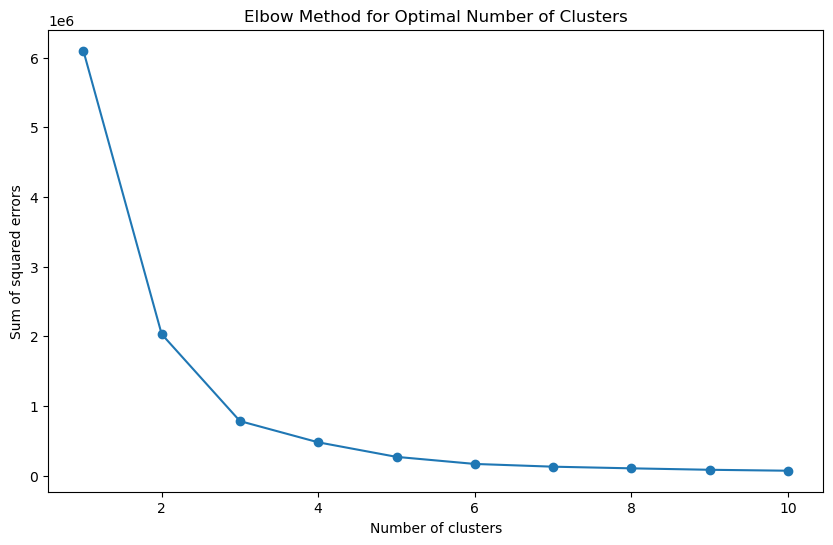

In [33]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(season_df[['level', 'average_rest_days', 'fatigue_units', 'average_muscle_fatigue', 'games_played', 'innings_pitched', 'total_pitches', 'WHIP', 'K/IP']])
    sse.append(kmeans.inertia_)

# Plot the SSE for each k to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [34]:
clusters = 4

kmeans = KMeans(n_clusters=clusters, random_state=42)
season_df['cluster'] = kmeans.fit_predict(season_df[['level', 'average_rest_days', 'fatigue_units', 'average_muscle_fatigue', 'games_played', 'innings_pitched', 'total_pitches', 'WHIP', 'K/IP']])

sil_score = silhouette_score(season_df[['level', 'average_rest_days', 'fatigue_units', 'average_muscle_fatigue', 'games_played', 'innings_pitched', 'total_pitches', 'WHIP', 'K/IP']], season_df['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5674929366135719


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
cluster_summary = season_df.groupby('cluster').mean().reset_index()
cluster_summary.drop(columns=['pitcher'], inplace=True)

In [36]:
cluster_summary

,cluster,hits,walks,strikeouts,batters_faced,innings_pitched,games_started,games_relieved,total_pitches,games_played,BB/IP,K/IP,Batters/IP,WHIP,average_pace,fatigue_units,average_muscle_fatigue,last_game_day_played,average_rest_days,level
0,0,29.166667,5.333333,10.666667,76.5,30.500000,3.291667,7.958333,428.500000,11.250000,0.176116,0.361540,2.517474,1.129700,13.109715,4.489797,1.666813,119.291667,8.693551,2.541667
1,1,5.372093,1.209302,1.627907,16.767442,5.348837,0.302326,2.511628,74.837209,2.813953,0.2958,0.268036,3.385783,1.381603,13.185692,0.709740,1.047853,71.883721,3.576227,2.302326
2,2,58.846154,10.846154,15.846154,87.461538,50.076923,8.0,2.0,776.076923,10.000000,0.211862,0.311760,1.739399,1.385046,13.928339,6.792817,2.596112,122.923077,10.169690,2.846154
3,3,15.7,2.65,6.275,50.2,17.475000,1.1,6.375,241.450000,7.475000,0.154764,0.354086,2.890842,1.064957,13.851501,2.491714,1.334686,112.475,8.271433,2.450000


In [37]:
cluster_summary.to_csv('cluster_summary.csv', index=False)

In [38]:
cluster_list = []
pitchers_list = season_df_extra['pitcher'].tolist()
level_list = season_df_extra['level'].tolist()
for i in range(len(season_df_extra)):
    pitcher_id = pitchers_list[i]
    level = level_list[i]
    cluster = season_df[(season_df['pitcher'] == pitcher_id) & (season_df['level'] == level)]['cluster'].values[0]
    cluster_list.append(cluster)
season_df_extra['cluster'] = cluster_list

In [39]:
cluster_summary_extra_df = season_df_extra.drop(columns=['pitcher']).groupby('cluster').mean().reset_index()

In [40]:
cluster_summary_extra_df

,cluster,hits,walks,strikeouts,batters_faced,innings_pitched,games_started,games_relieved,total_pitches,games_played,BB/IP,K/IP,Batters/IP,WHIP,average_pace,fatigue_units,average_muscle_fatigue,last_game_day_played,average_rest_days,level
0,0,1.4,0.4,0.2,6.4,1.8,0.0,1.6,25.4,1.6,0.133333,0.066667,3.333333,0.866667,18.766573,0.032,0.543267,92.0,7.0,3.2
1,1,1.6,0.6,0.4,4.8,1.2,0.0,1.0,14.8,1.0,0.6,0.3,4.3,2.1,13.453149,0.112,0.552288,66.4,0.0,2.2
2,3,1.5,0.333333,0.333333,5.833333,1.5,0.0,1.333333,23.666667,1.333333,0.166667,0.25,4.083333,1.25,14.949486,-0.013333,0.691246,88.666667,2.166667,2.0


In [41]:
cluster_summary_extra_df.to_csv('cluster_summary_extra_inning.csv', index=False)

In [42]:
season_df

,pitcher,hits,walks,strikeouts,batters_faced,innings_pitched,games_started,games_relieved,total_pitches,games_played,...,K/IP,Batters/IP,WHIP,average_pace,fatigue_units,average_muscle_fatigue,last_game_day_played,average_rest_days,level,cluster
0,305,14,0,4,35,14.0,1,3,189.0,4.0,...,0.285714,2.5,1.000000,13.096954,1.717143,1.591507,96,6.750000,1,3
1,344,13,2,4,30,11.0,0,4,165.0,4.0,...,0.363636,2.727273,1.363636,10.501347,1.398182,1.405477,54,5.250000,1,3
2,354,46,10,8,72,39.0,8,0,575.0,8.0,...,0.205128,1.846154,1.435897,12.482032,5.588718,2.380921,135,9.750000,1,0
3,364,37,5,11,54,27.0,6,0,433.0,6.0,...,0.407407,2.0,1.555556,13.661606,4.084444,2.387542,136,18.833333,1,0
4,367,12,4,8,62,17.0,0,9,240.0,9.0,...,0.470588,3.647059,0.941176,12.48099,2.398824,0.934257,76,6.666667,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,956,21,3,13,96,32.0,1,15,395.0,16.0,...,0.406250,3.0,0.750000,12.873518,4.766250,0.870021,106,5.625000,4,0
25,964,13,2,6,52,16.0,0,10,197.0,10.0,...,0.375000,3.25,0.937500,14.667017,2.473750,0.706296,54,4.100000,4,3
26,978,9,4,4,52,17.0,0,10,216.0,10.0,...,0.235294,3.058824,0.764706,16.263733,2.521176,0.763423,143,5.600000,4,3
27,987,22,1,4,66,19.0,1,9,274.0,10.0,...,0.210526,3.473684,1.210526,14.329481,2.821053,0.953472,120,7.300000,4,3


## Predictive Modelling

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [44]:
features = ['average_rest_days', 'fatigue_units', 'average_muscle_fatigue', 'games_played', 'total_pitches']
X = season_df[features]
y = season_df[['cluster']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [45]:
# XGB Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8125


In [46]:
# Random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


/var/folders/j6/mss06bz11xzd95_68wn5bxwc0000gn/T/ipykernel_1362/1085624731.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [47]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8958333333333334


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
joblib.dump(rf, 'pitcher_classifier_model.pkl')

['pitcher_classifier_model.pkl']

## Visualization

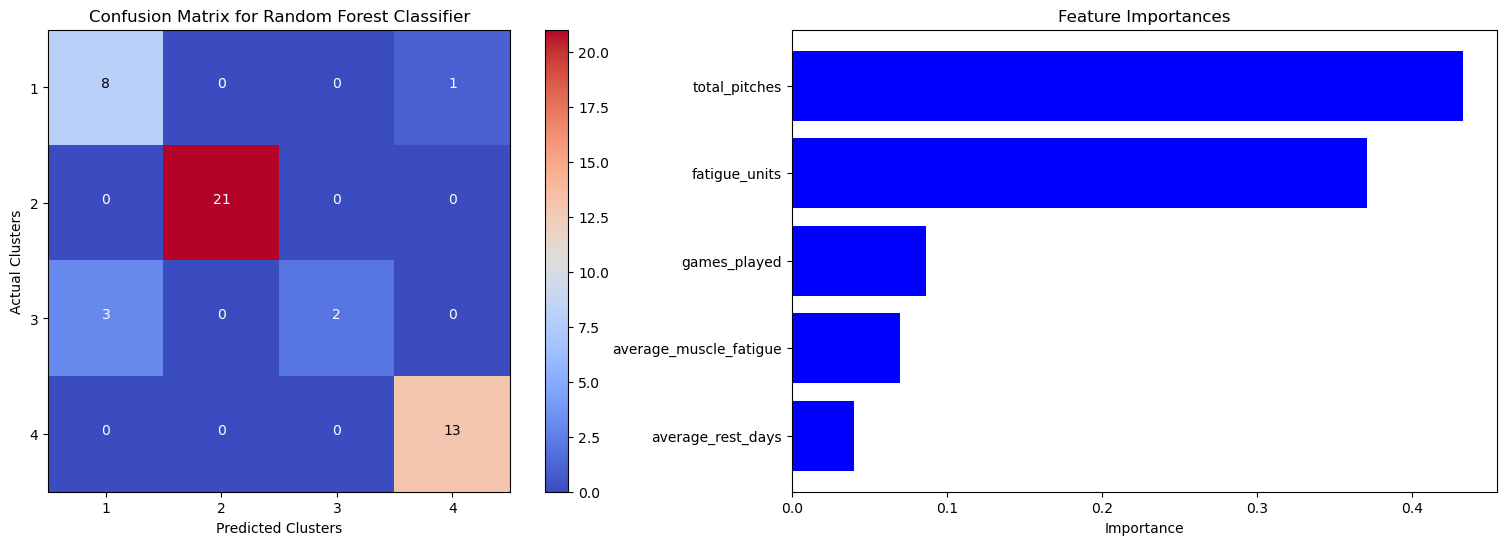

In [49]:
categories = ['1', '2', '3', '4']  
plt.figure(figsize=(20, 6))

# Plot confusion matrix
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.colorbar()

tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories)
plt.yticks(tick_marks, categories)

thresh = cm.max() / 3
for i in range(len(categories)):
    for j in range(len(categories)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if (cm[i, j] > (cm.max() - thresh) or cm[i, j] < thresh) else "black")
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Clusters')

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.subplot(1,2,2)
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="blue", align="center")
plt.yticks(range(X.shape[1]), np.array(features)[indices])
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.gca().invert_yaxis()

plt.show()

In [50]:
cluster_summary['cluster'] = cluster_summary['cluster'].map({0: 1, 1: 2, 2: 3, 3: 4})
season_df['cluster'] = season_df['cluster'].map({0: 1, 1: 2, 2: 3, 3: 4})
cluster_summary_extra_df['cluster'] = cluster_summary_extra_df['cluster'].map({0: 1, 1: 2, 2: 3, 3: 4})

In [51]:
pastel_colors = sns.color_palette("pastel")

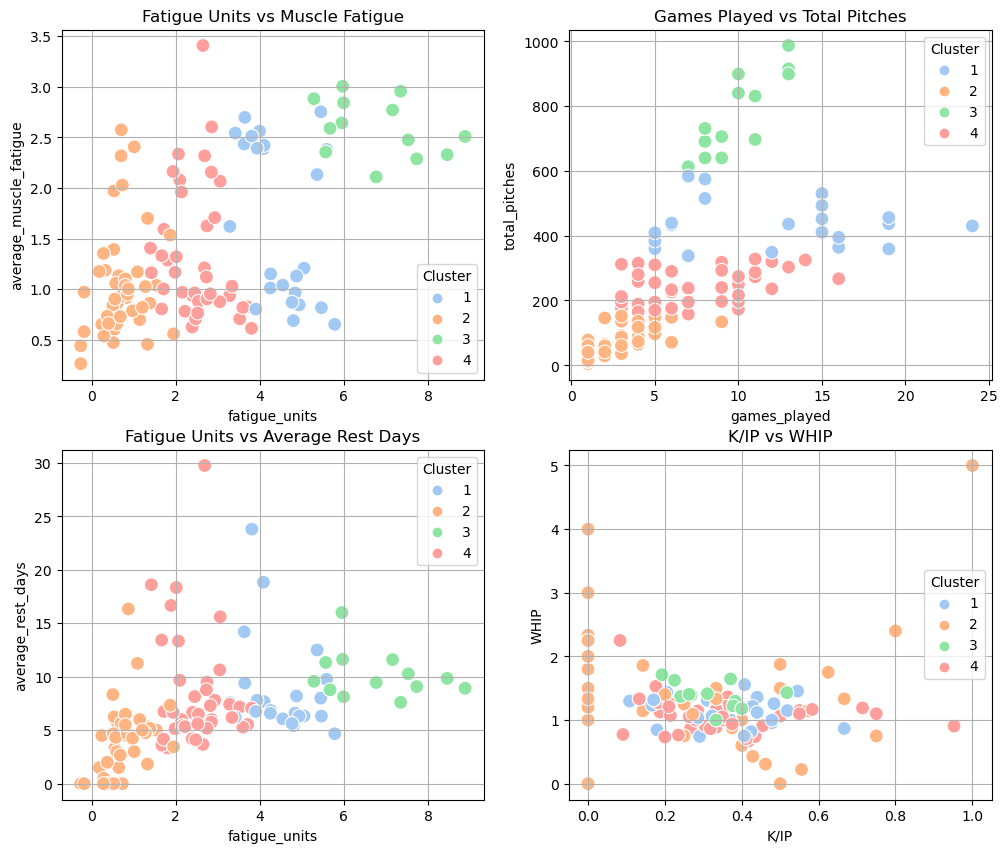

In [52]:
# Scatter plot using Seaborn
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=season_df, x='fatigue_units', y='average_muscle_fatigue', hue='cluster', palette='pastel', s=100)
plt.title('Fatigue Units vs Muscle Fatigue')
plt.xlabel('fatigue_units')
plt.ylabel('average_muscle_fatigue')
plt.legend(title='Cluster')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(data=season_df, x='games_played', y='total_pitches', hue='cluster', palette='pastel', s=100)
plt.title('Games Played vs Total Pitches')
plt.xlabel('games_played')
plt.ylabel('total_pitches')
plt.legend(title='Cluster')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(data=season_df, x='fatigue_units', y='average_rest_days', hue='cluster', palette='pastel', s=100)
plt.title('Fatigue Units vs Average Rest Days')
plt.xlabel('fatigue_units')
plt.ylabel('average_rest_days')
plt.legend(title='Cluster')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(data=season_df, x='K/IP', y='WHIP', hue='cluster', palette='pastel', s=100)
plt.title('K/IP vs WHIP')
plt.xlabel('K/IP')
plt.ylabel('WHIP')
plt.legend(title='Cluster')
plt.grid(True)



plt.show()

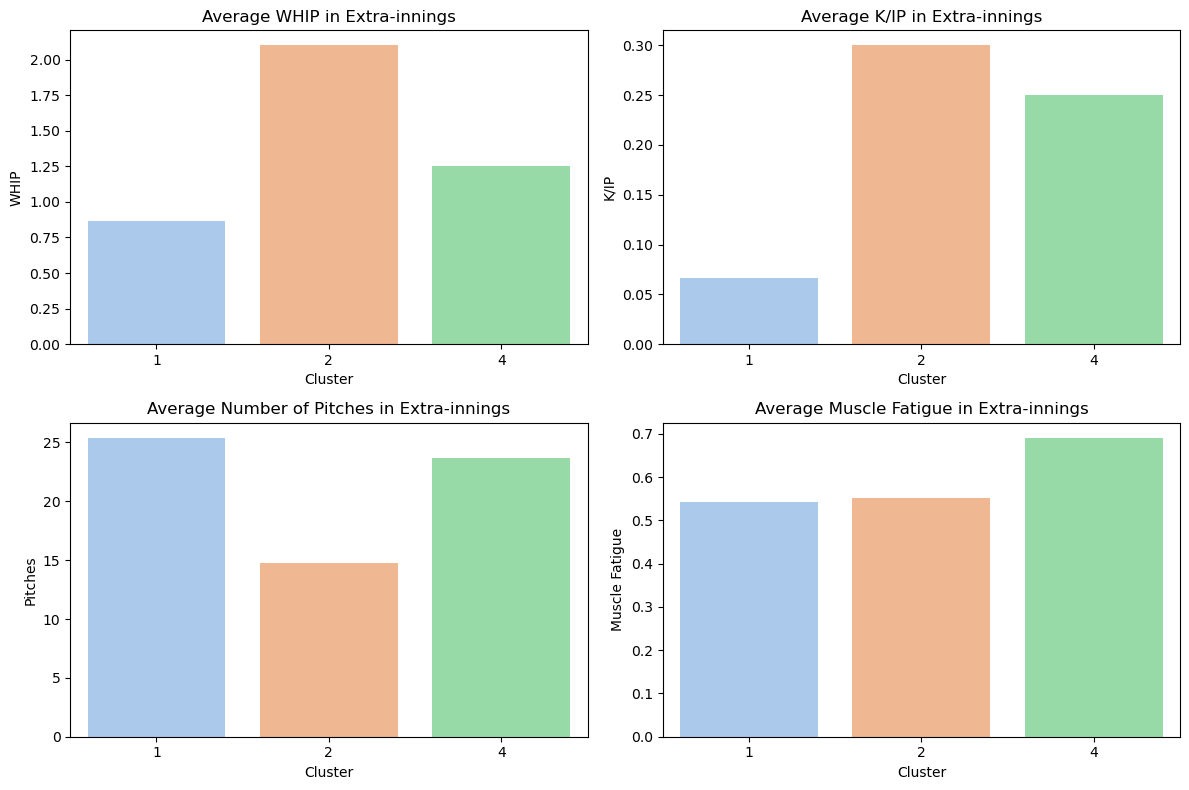

In [67]:
# Plotting the average performance metrics for each cluster
plt.figure(figsize=(12, 8))

# WHIP by cluster
plt.subplot(2, 2, 1)
sns.barplot(x=cluster_summary_extra_df['cluster'], y=cluster_summary_extra_df['WHIP'], palette='pastel')
plt.title('Average WHIP in Extra-innings')
plt.xlabel('Cluster')
plt.ylabel('WHIP')

# Strikeouts per inning by cluster
plt.subplot(2, 2, 2)
sns.barplot(x=cluster_summary_extra_df['cluster'], y=cluster_summary_extra_df['K/IP'], palette='pastel')
plt.title('Average K/IP in Extra-innings')
plt.xlabel('Cluster')
plt.ylabel('K/IP')

# Total pitches by cluster
plt.subplot(2, 2, 3)
sns.barplot(x=cluster_summary_extra_df['cluster'], y=cluster_summary_extra_df['total_pitches'], palette='pastel')
plt.title('Average Number of Pitches in Extra-innings')
plt.xlabel('Cluster')
plt.ylabel('Pitches')

# Muscle fatigue by cluster
plt.subplot(2, 2, 4)
sns.barplot(x=cluster_summary_extra_df['cluster'], y=cluster_summary_extra_df['average_muscle_fatigue'], palette='pastel')
plt.title('Average Muscle Fatigue in Extra-innings')
plt.xlabel('Cluster')
plt.ylabel('Muscle Fatigue')

plt.tight_layout()
plt.show()

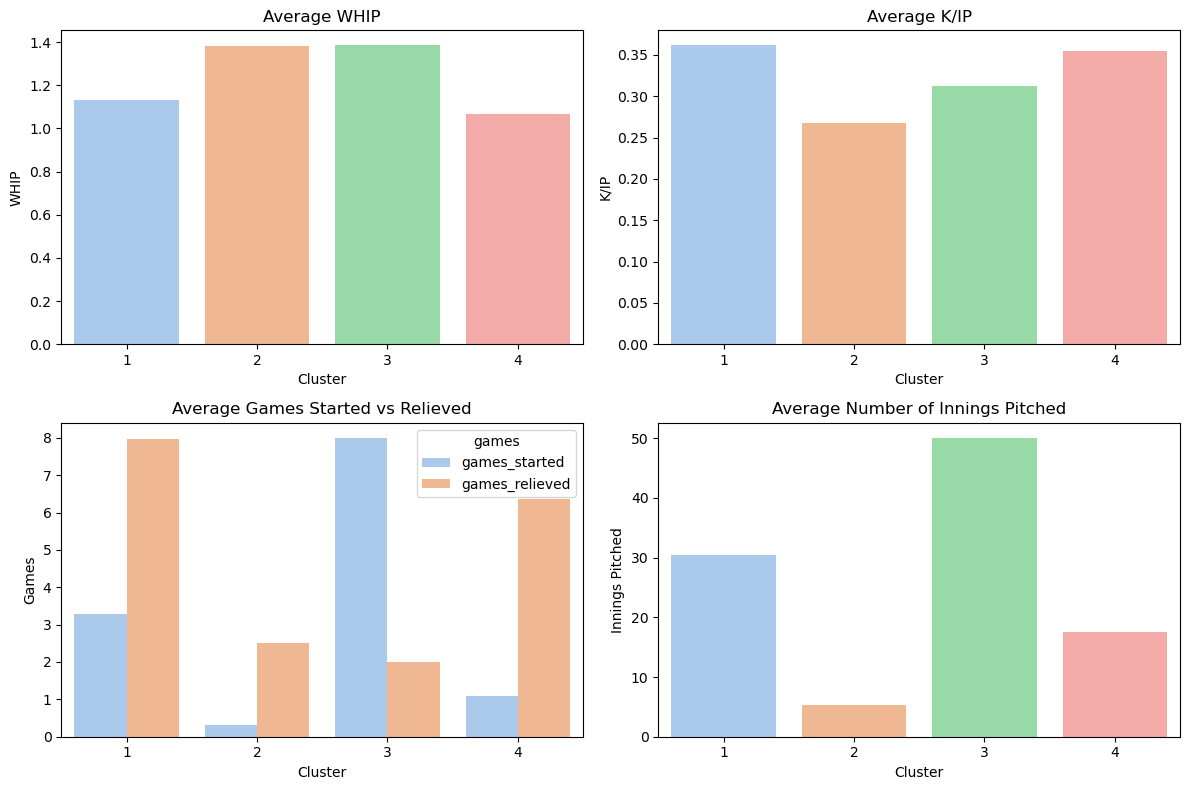

In [69]:
# Plotting the average performance metrics for each cluster
plt.figure(figsize=(12, 8))

# WHIP by cluster
plt.subplot(2, 2, 1)
sns.barplot(x=cluster_summary['cluster'], y=cluster_summary['WHIP'], palette='pastel')
plt.title('Average WHIP')
plt.xlabel('Cluster')
plt.ylabel('WHIP')

# Strikeouts per inning by cluster
plt.subplot(2, 2, 2)
sns.barplot(x=cluster_summary['cluster'], y=cluster_summary['K/IP'], palette='pastel')
plt.title('Average K/IP')
plt.xlabel('Cluster')
plt.ylabel('K/IP')

# Games started vs relieved by cluster
melted_df = cluster_summary.melt(id_vars=['cluster'], 
                    value_vars=['games_started', 'games_relieved'],
                    var_name='games', value_name='value')
plt.subplot(2, 2, 3)
sns.barplot(x='cluster', y='value', hue='games', data=melted_df, palette='pastel')
plt.title('Average Games Started vs Relieved')
plt.xlabel('Cluster')
plt.ylabel('Games')

# Innings pitched by cluster
plt.subplot(2, 2, 4)
sns.barplot(x=cluster_summary['cluster'], y=cluster_summary['innings_pitched'], palette='pastel')
plt.title('Average Number of Innings Pitched')
plt.xlabel('Cluster')
plt.ylabel('Innings Pitched')

plt.tight_layout()
plt.show()

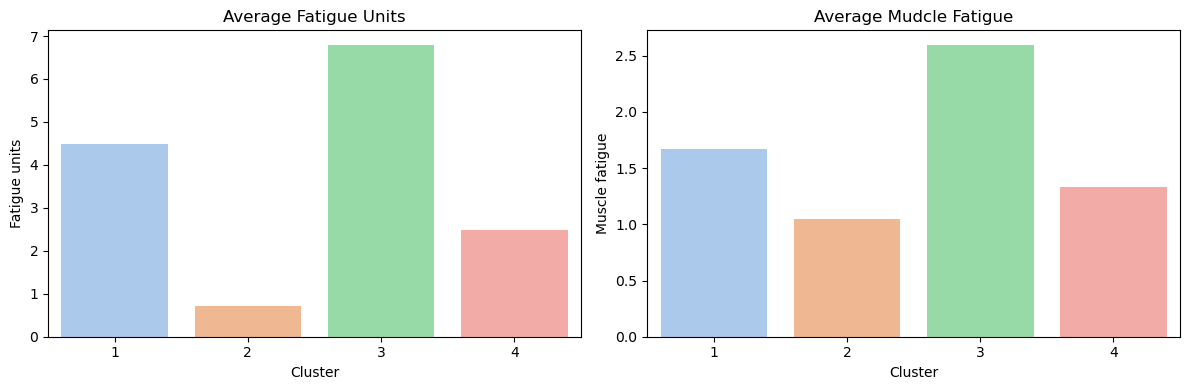

In [70]:
# Plotting the average performance metrics for each cluster
plt.figure(figsize=(12, 4))

# Fatigue units by cluster
plt.subplot(1, 2, 1)
sns.barplot(x=cluster_summary['cluster'], y=cluster_summary['fatigue_units'], palette='pastel')
plt.title('Average Fatigue Units')
plt.xlabel('Cluster')
plt.ylabel('Fatigue units')

# Muscle fatigue by cluster
plt.subplot(1, 2, 2)
sns.barplot(x=cluster_summary['cluster'], y=cluster_summary['average_muscle_fatigue'], palette='pastel')
plt.title('Average Mudcle Fatigue')
plt.xlabel('Cluster')
plt.ylabel('Muscle fatigue')

plt.tight_layout()
plt.show()

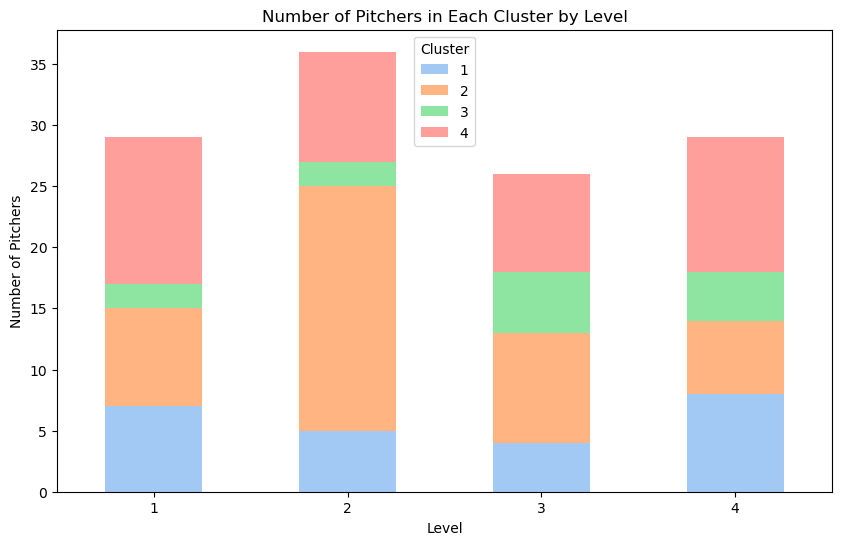

In [60]:
cluster_counts = season_df.groupby(['level', 'cluster']).size().reset_index(name='counts')
cluster_pivot = cluster_counts.pivot(index='level', columns='cluster', values='counts')
cluster_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=pastel_colors)
plt.title('Number of Pitchers in Each Cluster by Level')
plt.xticks(rotation=0)
plt.xlabel('Level')
plt.ylabel('Number of Pitchers')
plt.legend(title='Cluster', loc='upper center')
plt.show()

## Results

In [73]:
season_df['roles'] = season_df['cluster'].apply(lambda x: 'Versatile Reliever' if x == 1 else 'Middle Reliever' if x == 2 else 'Starting Pitcher' if x == 3 else 'Closer')

In [74]:
season_df[['level', 'pitcher', 'roles']].to_csv('pitcher_roles.csv', index=False)